In [2]:
# run from suite2p environment!!
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.io as sio
import sys
sys.path.append('./helpers')
import helpers
import loadmat as lm
from sklearn import linear_model
from scipy import signal
from sklearn.model_selection import cross_val_score, cross_validate
import os
from sklearn.metrics import make_scorer, confusion_matrix
import glob
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from helpers import preprocess


In [190]:
files = glob.glob('Z:/giocomo/attialex/NP_DATA/np*_gain*.mat')


In [113]:
tmp_array = np.arange(12)
region = 'MEC'
name = 'test'
np.save('C:\\temp\\'+region +'_'+ name + '_scores.npy',tmp_array)


In [4]:
test_data = lm.loadmat(files[1])

In [1]:
data_preprocessed = helpers.helpers.preprocess(data)

NameError: name 'helpers' is not defined

In [77]:
posx = test_data['posx']
x_val = []

In [78]:
speed = np.diff(posx)/0.02
speed = np.hstack((0,speed))
speed[speed>150]=np.nan;
speed[speed<-5]=np.nan;
idx_v = np.flatnonzero(np.logical_not(np.isnan(speed)))
idx_n = np.flatnonzero(np.isnan(speed))
speed[idx_n]=np.interp(idx_n,idx_v,speed[~np.isnan(speed)])
speed = spi.gaussian_filter1d(speed,10)

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [42]:
np.sum(np.isnan(speed))

1328

In [64]:
ok = np.logical_not(np.isnan(speed))
xp = ok.nonzero()[0]
fp = speed[~np.isnan(speed)]
x  = np.flatnonzero(np.isnan(speed))

speed[np.isnan(speed)] = np.interp(x, xp, fp)
x

0

In [72]:
import scipy.ndimage as spi



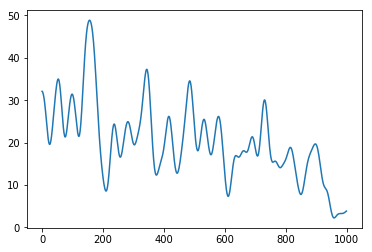

In [75]:
speed_s = spi.gaussian_filter1d(speed,10)
plt.plot(speed_s[0:1000])

In [128]:
import importlib
import helpers
importlib.reload(helpers)

<module 'helpers' from './helpers\\helpers.py'>

In [192]:
import classify_gain_sherlock as cgs
importlib.reload(cgs)

<module 'classify_gain_sherlock' from 'C:\\code\\AlexA_Library\\NP_python\\classify_gain_sherlock.py'>

In [129]:
data_processed = helpers.preprocess(test_data)

./helpers\helpers.py:62: RuntimeWarning: invalid value encountered in less
  speed[idx_n]=np.interp(idx_n,idx_v,speed[~np.isnan(speed)])


In [130]:
(model, bl_scores) = cgs.eval_and_train(data_processed,np.arange(0,21))

In [194]:
(Ypred,Ytrue,speed,t,a) = cgs.score_gain_model(model,data_processed)

In [195]:
cgs.run_pipeline(files[1])

Now working on Z:/giocomo/attialex/NP_DATA\npF2_1016_contrasttrack_gainchanges_1.mat


./helpers\helpers.py:62: RuntimeWarning: invalid value encountered in less
  speed[idx_n]=np.interp(idx_n,idx_v,speed[~np.isnan(speed)])


In [107]:
    track_start = 0
    track_end = 400
    dx=5
    dt=0.2
    every_nth_time_bin = 10
    numposbins = np.floor((track_end-track_start)/dx)
    posx_edges = np.linspace(track_start,track_end,numposbins+1)
    posx_centers = 0.5 * posx_edges[0:-1] + 0.5*posx_edges[1::]

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


In [109]:
Yhat.min()

1

In [214]:
dat = np.load(files[3])

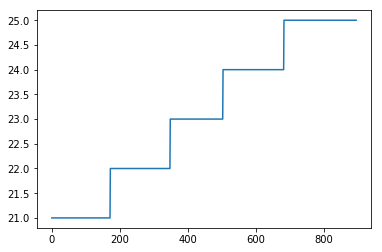

In [219]:
plt.plot(dat[3])

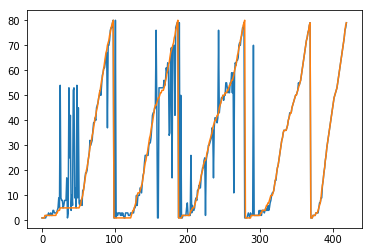

In [215]:
plt.plot(dat[0])
dig = np.digitize(dat[1],dat[4])
plt.plot(dig)

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


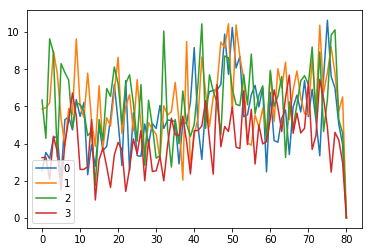

In [229]:
files = glob.glob('C:\\temp\\classifier_out\\*.npy');
for iT in range(4):
    allErrors=np.array([])
    for ii,iF in enumerate(files):
        dat=np.load(iF)
        nBins = len(dat[4])
        dig = np.digitize(dat[1],dat[4])
        error = dig-dat[0]
        error = np.array(error)
        error[error>40]=error[error>40]-80
        error[error<-40]=error[error<-40]+80
        error = np.sqrt(np.square(error))
        bins = np.digitize(dat[1],dat[4])
        bins = bins-1
        error_tmp = np.zeros((nBins,))
        for idx in range(nBins):
            tmp =np.nanmean(error[np.logical_and(bins==idx,dat[3]==21+iT)])
            if ~np.isnan(tmp):
                error_tmp[idx]=tmp
        if ii==0:
            allErrors = error_tmp
        else:
            allErrors = np.vstack((allErrors,error_tmp))

    plt.plot(np.nanmean(allErrors,0),label=iT)
plt.legend()

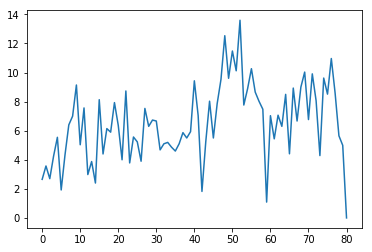